In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
elec = pd.read_csv('data/amazon_reviews_us_Electronics_v1_00.tsv', sep='\t',on_bad_lines='skip')

NameError: name 'boto3' is not defined

In [5]:
elec.shape

(3091024, 15)

In [6]:
elec.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [9]:
n_ratings = len(elec)
n_products = elec['product_id'].nunique()
n_customers = elec['customer_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique productId's: {n_products}")
print(f"Number of unique customers: {n_customers}")
print(f"Average number of ratings per user: {round(n_ratings/n_customers, 2)}")
print(f"Average number of ratings per product: {round(n_ratings/n_products, 2)}")

Number of ratings: 3091024
Number of unique productId's: 185774
Number of unique customers: 2152773
Average number of ratings per user: 1.44
Average number of ratings per product: 16.64


In [17]:
user_freq = elec[['customer_id', 'product_id']].groupby('customer_id').count().reset_index()
user_freq.columns = ['customer_id', 'n_ratings']
user_freq.sort_values('n_ratings',ascending=False).head()

,customer_id,n_ratings
1918340,49266466,234
2150435,53075795,198
1199484,30669680,190
2146385,53037408,180
1997907,50820654,171


In [20]:
print(f"Mean number of ratings for a given user: {user_freq['n_ratings'].mean():.2f}.")

Mean number of ratings for a given user: 1.44.


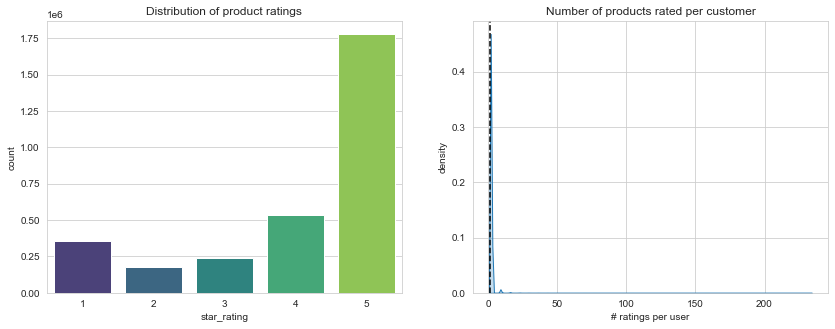

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="star_rating", data=elec, palette="viridis")
plt.title("Distribution of product ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of products rated per customer")
plt.show()

In [31]:
mean_rating = elec.groupby('product_id')[['star_rating']].mean()

lowest_rated = mean_rating['star_rating'].idxmin()
elec.loc[elec['product_id'] == lowest_rated]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
804653,US,37044558,R4H12F1B11JGK,1467501794,560362591,Kenwood Dc Stereo Integrated Amplifier Receive...,Electronics,1,0,0,N,Y,was not very happy it did not work to well try...,was not very happy it did not work to well try...,2015-01-02


In [32]:
mean_rating

,star_rating
product_id,
0141186178,5.000000
0303532572,4.500000
043964383X,5.000000
0511189877,4.387755
0528881469,3.147059
...,...
B016OF0IDI,5.000000
B0188YEWQM,1.000000
B019IOIOK6,5.000000
